<a href="https://colab.research.google.com/github/TarunSunkaraneni/TensorFlow/blob/master/Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
# a tensor
n_values = 32
x = tf.linspace(-3.0,3.0, n_values)

In [0]:
# session
sess = tf.InteractiveSession()

In [11]:
x.eval()

array([-3.        , -2.8064516 , -2.612903  , -2.419355  , -2.2258065 ,
       -2.032258  , -1.8387097 , -1.6451614 , -1.451613  , -1.2580645 ,
       -1.0645162 , -0.8709678 , -0.6774194 , -0.48387104, -0.29032266,
       -0.09677428,  0.0967741 ,  0.29032248,  0.48387086,  0.67741925,
        0.8709676 ,  1.0645161 ,  1.2580644 ,  1.4516127 ,  1.6451612 ,
        1.8387096 ,  2.032258  ,  2.2258062 ,  2.4193547 ,  2.612903  ,
        2.8064513 ,  2.9999998 ], dtype=float32)

In [0]:
# Z distribution
sigma, mean = 1.0, 0
z = (1/(sigma * tf.sqrt(2.0 * 3.1415))) * tf.exp(tf.negative(tf.pow(x - mean, 2.0) / (2.0 * tf.pow(sigma, 2.0))))

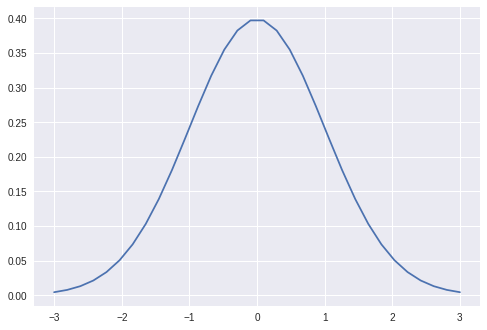

In [15]:
plt.plot(x.eval(),z.eval())

In [21]:
print(tf.shape(z).eval())

[32]


In [24]:
print(tf.stack([tf.shape(z), tf.shape(z), [3], [4]]).eval())

[[32]
 [32]
 [ 3]
 [ 4]]


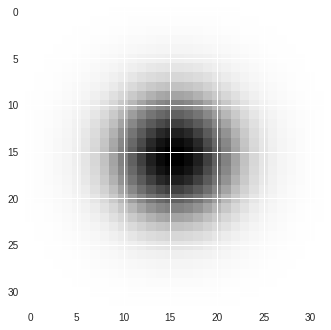

In [26]:
z_2d = tf.matmul(tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))
plt.imshow(z_2d.eval())

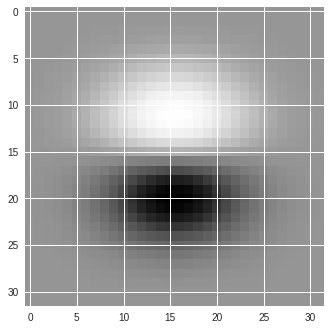

In [27]:
x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
y = tf.reshape(tf.ones_like(x), [1, n_values])
z = tf.multiply(tf.matmul(x, y), z_2d)
plt.imshow(z.eval())

['LinSpace/start', 'LinSpace/stop', 'LinSpace/num', 'LinSpace', 'LinSpace_1/start', 'LinSpace_1/stop', 'LinSpace_1/num', 'LinSpace_1', 'sub/y', 'sub', 'Pow/y', 'Pow', 'Pow_1/x', 'Pow_1/y', 'Pow_1', 'mul/x', 'mul', 'truediv', 'Neg', 'Exp', 'sub_1/y', 'sub_1', 'Pow_2/y', 'Pow_2', 'Pow_3/x', 'Pow_3/y', 'Pow_3', 'mul_1/x', 'mul_1', 'truediv_1', 'Neg_1', 'Exp_1', 'Sqrt/x', 'Sqrt', 'mul_2/x', 'mul_2', 'truediv_2/x', 'truediv_2', 'mul_3', 'Shape', 'Shape_1', 'Shape_2', 'Shape_3', 'stack/2_1', 'stack/3_1', 'stack', 'Reshape/shape', 'Reshape', 'Reshape_1/shape', 'Reshape_1', 'MatMul', 'Reshape_2/shape', 'Reshape_2', 'Reshape_3/shape', 'Reshape_3', 'MatMul_1', 'LinSpace_2/start', 'LinSpace_2/stop', 'LinSpace_2/num', 'LinSpace_2', 'Sin', 'Reshape_4/shape', 'Reshape_4', 'ones_like/Shape', 'ones_like/Const', 'ones_like', 'Reshape_5/shape', 'Reshape_5', 'MatMul_2', 'Mul_4', 'LinSpace_3/start', 'LinSpace_3/stop', 'LinSpace_3/num', 'LinSpace_3', 'sub_2/y', 'sub_2', 'Pow_4/y', 'Pow_4', 'Pow_5/x', 'Pow_

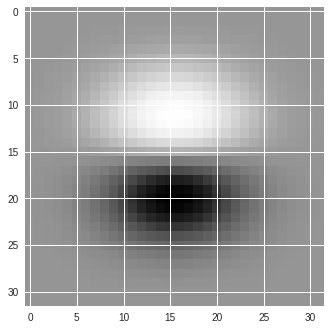

In [29]:
ops = tf.get_default_graph().get_operations()
print([op.name for op in ops])

# %% Lets try creating a generic function for computing the same thing:
def gabor(n_values=32, sigma=1.0, mean=0.0):
    x = tf.linspace(-3.0, 3.0, n_values)
    z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                       (2.0 * tf.pow(sigma, 2.0)))) *
         (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
    gauss_kernel = tf.matmul(
        tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))
    x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
    y = tf.reshape(tf.ones_like(x), [1, n_values])
    gabor_kernel = tf.multiply(tf.matmul(x, y), gauss_kernel)
    return gabor_kernel

# %% Confirm this does something:
plt.imshow(gabor().eval())

(512, 512, 3)


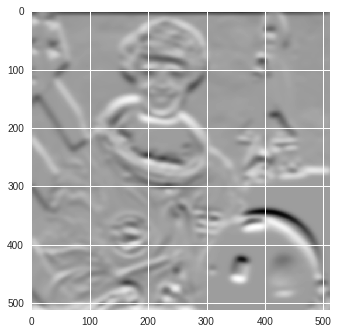

In [30]:
def convolve(img, W):
    # The W matrix is only 2D
    # But conv2d will need a tensor which is 4d:
    # height x width x n_input x n_output
    if len(W.get_shape()) == 2:
        dims = W.get_shape().as_list() + [1, 1]
        W = tf.reshape(W, dims)

    if len(img.get_shape()) == 2:
        # num x height x width x channels
        dims = [1] + img.get_shape().as_list() + [1]
        img = tf.reshape(img, dims)
    elif len(img.get_shape()) == 3:
        dims = [1] + img.get_shape().as_list()
        img = tf.reshape(img, dims)
        # if the image is 3 channels, then our convolution
        # kernel needs to be repeated for each input channel
        W = tf.concat(axis=2, values=[W, W, W])

    # Stride is how many values to skip for the dimensions of
    # num, height, width, channels
    convolved = tf.nn.conv2d(img, W,
                             strides=[1, 1, 1, 1], padding='SAME')
    return convolved

# %% Load up an image:
from skimage import data
img = data.astronaut()
plt.imshow(img)
print(img.shape)

# %% Now create a placeholder for our graph which can store any input:
x = tf.placeholder(tf.float32, shape=img.shape)

# %% And a graph which can convolve our image with a gabor
out = convolve(x, gabor())

# %% Now send the image into the graph and compute the result
result = tf.squeeze(out).eval(feed_dict={x: img})
plt.imshow(result)